# Demo


## 0. words from train data set

In [17]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
def draw(dataFile):
    data = pd.read_csv(dataFile)
    data = data[['Review','Label']]

    data_pos = data[ (data['Label'] == 5) | (data['Label'] == 4) ]
    data_pos = data_pos['Review']
    data_neg = data[ (data['Label'] == 1) | (data['Label'] == 2) ]
    data_neg = data_neg['Review']

    print("Positive words from data set ", dataFile)
    wordcloud_draw(data_pos,'white')
    print("Negative words from data set ", dataFile)
    wordcloud_draw(data_neg)
    
def draw_by_label(dataFile, label):
    data = pd.read_csv(dataFile)
    data = data[['Review','Label']]

    data_label = data[ (data['Label'] == label)]
    data_label = data_label['Review']
    
    print(label, "-label words from data set ", dataFile)
    wordcloud_draw(data_label,'white')

Positive words from data set  ../100k-courseras-course-reviews-dataset/reviews_train.csv


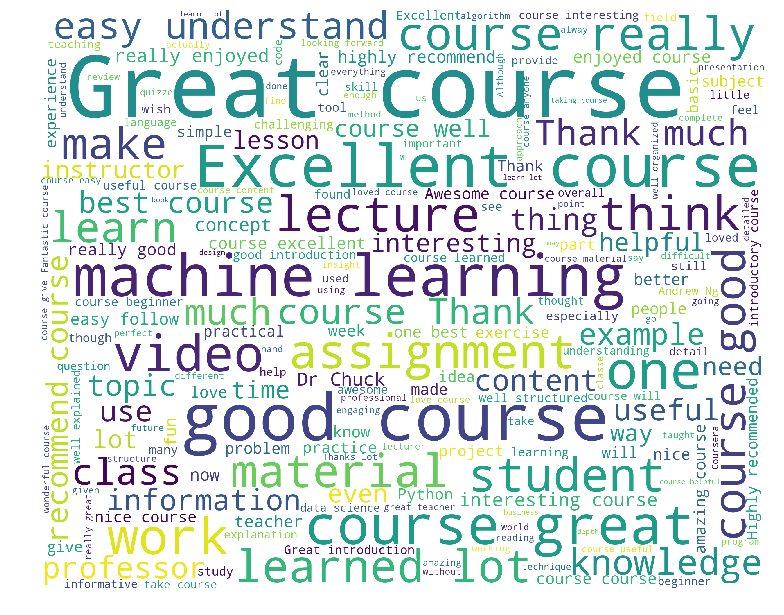

Negative words from data set  ../100k-courseras-course-reviews-dataset/reviews_train.csv


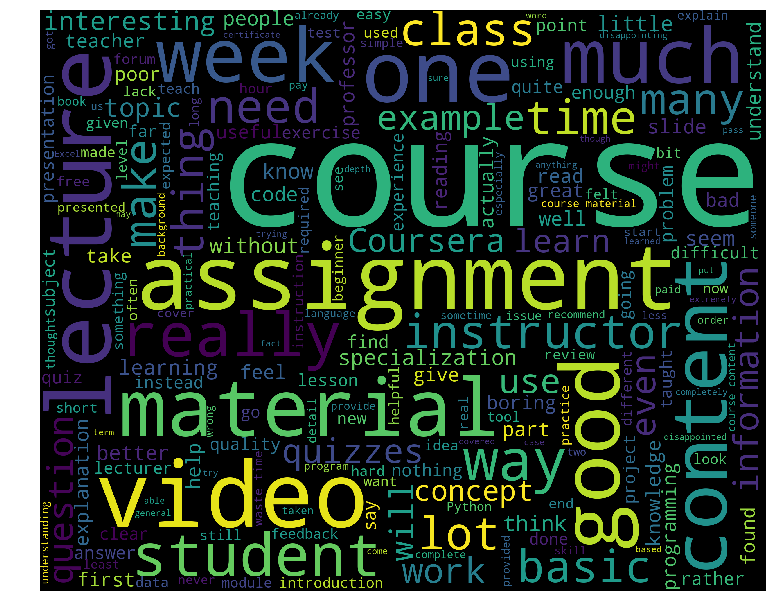

In [11]:
draw('../100k-courseras-course-reviews-dataset/reviews_train.csv')

## Demo for DL (LSTM RNN) model

In [40]:
import numpy as np
import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

def get_tokenizer(dataFile, max_fatures):
    data = pd.read_csv(dataFile)
    data = data[['Review','Label']]

    data['Review'] = data['Review'].apply(lambda x: x.lower())
    data['Review'] = data['Review'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
    
    tokenizer = Tokenizer(num_words=max_fatures, split=' ')
    tokenizer.fit_on_texts(data['Review'].values)
    X = tokenizer.texts_to_sequences(data['Review'].values)
    X = pad_sequences(X)
#     Y = pd.get_dummies(data['Label']).values
    
    return tokenizer, X.shape[1]

tokenizer, feature_len = get_tokenizer('../100k-courseras-course-reviews-dataset/reviews.csv', max_fatures = 2000)

def preprocess_review(review):
    review = re.sub('[^a-zA-z0-9\s]','',review.lower())
    sequence = tokenizer.texts_to_sequences([review])
    feature_vec = pad_sequences(sequence, maxlen=feature_len)
    return feature_vec

model = load_model('LSTM_v0.1.h5')
labels = ['VeryNegative', 'Negative', 'Netural', 'Positive', 'VeryPositive']

def label_review(review):
    feature_vec=preprocess_review(review)
    predict_values = model.predict(feature_vec, batch_size=32, verbose=2, steps=None)
    label_index = np.argmax(predict_values)
    
    
    print('"', review, '"', ' IS ', labels[label_index])
    
    return label_index + 1

In [46]:
# try single review

import timeit

start = timeit.default_timer()

label_review("I enjoyed the course. Not a difficult course but the course experience was great. Instructor was also really good at explaining concepts.")

stop = timeit.default_timer()
print('took(s): ', stop - start)

" I enjoyed the course. Not a difficult course but the course experience was great. Instructor was also really good at explaining concepts. "  IS  VeryPositive
took(s):  0.15426840000145603


In [53]:
# try random review from dataset
import random

test_data = pd.read_csv('../100k-courseras-course-reviews-dataset/reviews_test.csv')
print(test_data.shape)
random_review_index = random.randint(0, test_data.shape[0])

predict_label = label_review(test_data['Review'][random_review_index])
print('The predict label: ', predict_label, ', The true label: ', test_data['Label'][random_review_index])

(10702, 3)
" A very interesting course for all teachers. "  IS  VeryPositive
The predict label:  5 , The true label:  5


## Demo for ML (Random Forest Classification) Model